### First we import the csv file and print the head of the dataframe

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import find_peaks
# pd.options.display.width = 0
from IPython.display import display, HTML
# display(HTML("<style>.jp-Cell { width: 200% !important; }</style>"))

# Dataset was downloaded February 2024 from https://www.kaggle.com/datasets/daniboy370/boston-marathon-2019

df = pd.read_csv('Dataset-Boston-2019.csv')
print(df.head()) 


   Rank_Tot  Age Gender   Country Result_hr  Result_sec  Rank_Gender  \
0         1   30      M     Kenya   2:07:57        7677            1   
1         2   29      M  Ethiopia   2:07:59        7679            2   
2         3   34      M     Kenya   2:08:07        7687            3   
3         4   32      M     Kenya   2:08:54        7734            4   
4         5   26      M     Kenya   2:08:55        7735            5   

  Country_code  
0          KEN  
1          ETH  
2          KEN  
3          KEN  
4          KEN  


### Then we plot a distribution of marathon finish times by gender

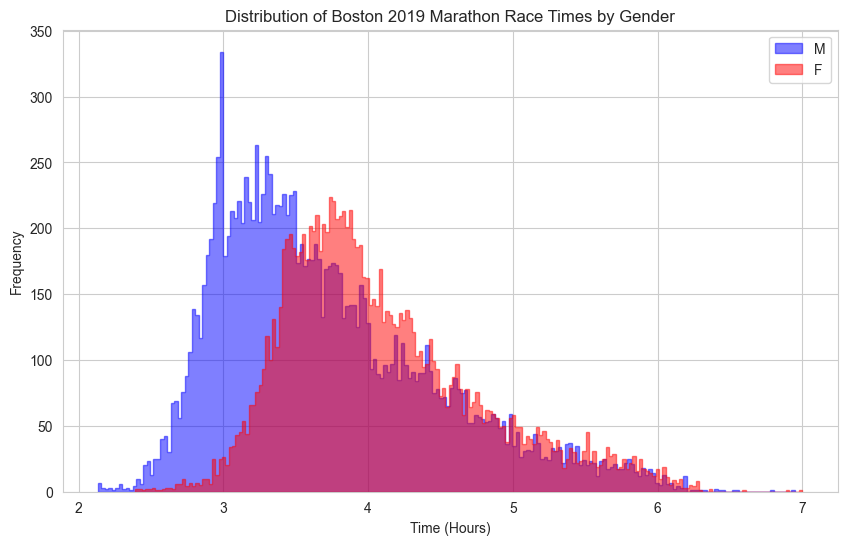

In [31]:
# Convert 'Result_hr' to timedelta
df['Result_hr'] = pd.to_timedelta(df['Result_hr'])

# Calculate race times in hours
df['Result_hr_numeric'] = df['Result_hr'].dt.total_seconds() / 3600

# Plot the distribution of race times by gender
plt.figure(figsize=(10, 6))

for gender, color in zip(['M', 'F'], ['blue', 'red']):
    gender_data = df[df['Gender'] == gender]['Result_hr_numeric']
    plt.hist(gender_data, bins=200, alpha=0.5, color=color, label=gender, edgecolor=color, histtype="stepfilled")

plt.xlabel('Time (Hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Boston 2019 Marathon Race Times by Gender')

plt.legend()
plt.grid(True)
plt.show()

### Can we also show a line instead of the histogram bars? Yes with a kernel density estimation (KDE) plot:

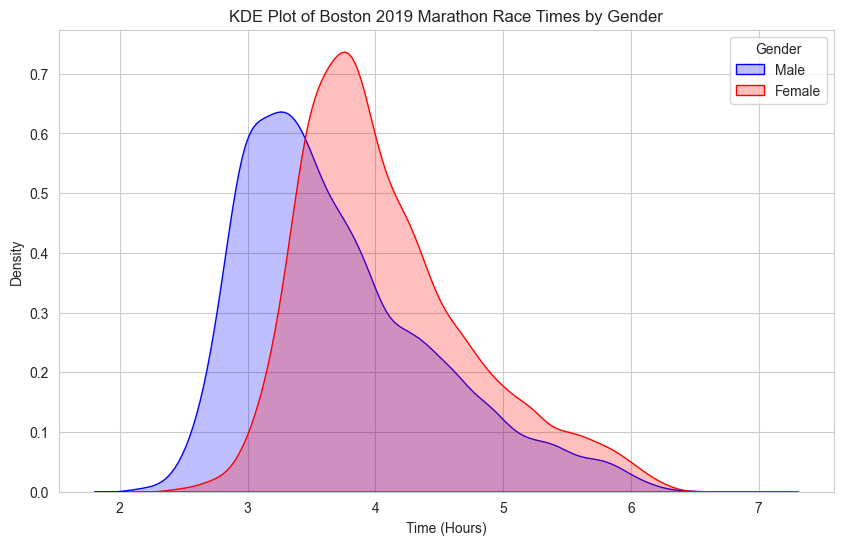

In [32]:
# Convert 'Result_hr' to timedelta
df['Result_hr'] = pd.to_timedelta(df['Result_hr'])

# Calculate race times in hours
df['Result_hr_numeric'] = df['Result_hr'].dt.total_seconds() / 3600

# Set up the Seaborn style
sns.set_style("whitegrid")

# Plot the KDE distribution of race times by gender
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df[df['Gender'] == 'M'], x='Result_hr_numeric', label='Male', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=df[df['Gender'] == 'F'], x='Result_hr_numeric', label='Female', fill=True, common_norm=False, color='red')

plt.xlabel('Time (Hours)')
plt.ylabel('Density')
plt.title('KDE Plot of Boston 2019 Marathon Race Times by Gender')

plt.legend(title='Gender')
plt.show()

### Now we also want to add horizontal lines to indicate the width of the distributions

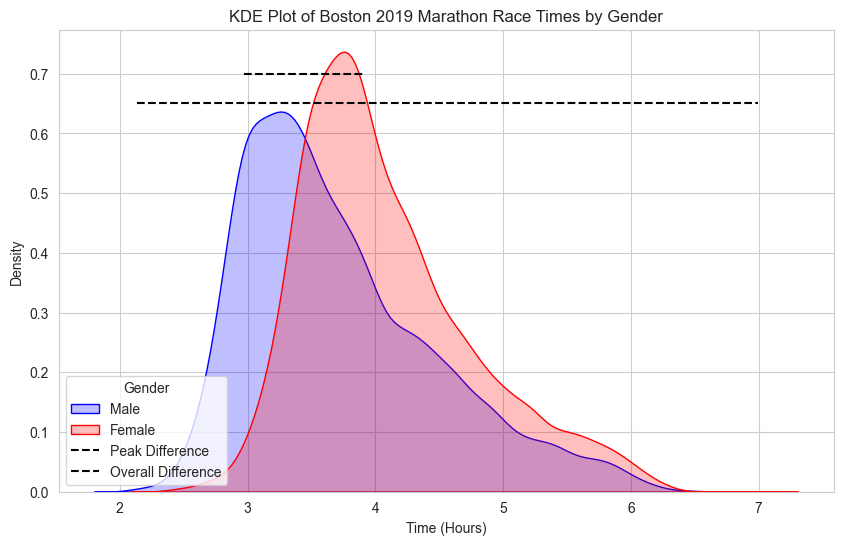

In [33]:
# Convert 'Result_hr' to timedelta
df['Result_hr'] = pd.to_timedelta(df['Result_hr'])

# Calculate race times in hours
df['Result_hr_numeric'] = df['Result_hr'].dt.total_seconds() / 3600

# Set up the Seaborn style
sns.set_style("whitegrid")

# Plot the KDE distribution of race times by gender
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df[df['Gender'] == 'M'], x='Result_hr_numeric', label='Male', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=df[df['Gender'] == 'F'], x='Result_hr_numeric', label='Female', fill=True, common_norm=False, color='red')

# Calculate peak points for each gender's distribution
peak_male = df[df['Gender'] == 'M']['Result_hr_numeric'].mode().values[0]
peak_female = df[df['Gender'] == 'F']['Result_hr_numeric'].mode().values[0]

# Get x-axis limits
xlim = plt.xlim()

# Draw horizontal lines
plt.axhline(0.7, color='black', linestyle='--', label='Peak Difference', xmin=(peak_male - xlim[0]) / (xlim[1] - xlim[0]), xmax=(peak_female - xlim[0]) / (xlim[1] - xlim[0]))
#plt.axhline(peak_female, color='black', linestyle='--', label='Peak Female', xmin=(peak_male - xlim[0]) / (xlim[1] - xlim[0]), xmax=(peak_female - xlim[0]) / (xlim[1] - xlim[0]))

# Calculate overall range
min_x = df['Result_hr_numeric'].min()
max_x = df['Result_hr_numeric'].max()

# Draw second horizontal line
plt.axhline(0.65, color='black', linestyle='--', label='Overall Difference', xmin=(min_x - xlim[0]) / (xlim[1] - xlim[0]), xmax=(max_x - xlim[0]) / (xlim[1] - xlim[0]))
#plt.axhline(max_x, color='gray', linestyle=':', label='Max Overall', xmin=0, xmax=1)

plt.xlabel('Time (Hours)')
plt.ylabel('Density')
plt.title('KDE Plot of Boston 2019 Marathon Race Times by Gender')

plt.legend(title='Gender')
plt.show()



### The peaks form the raw data are not that close to the peaks of the smoothed KDE curve. We can calculate those peaks instead for drawing the distribution lines 

3.2578486251147103 3.2578486251147103


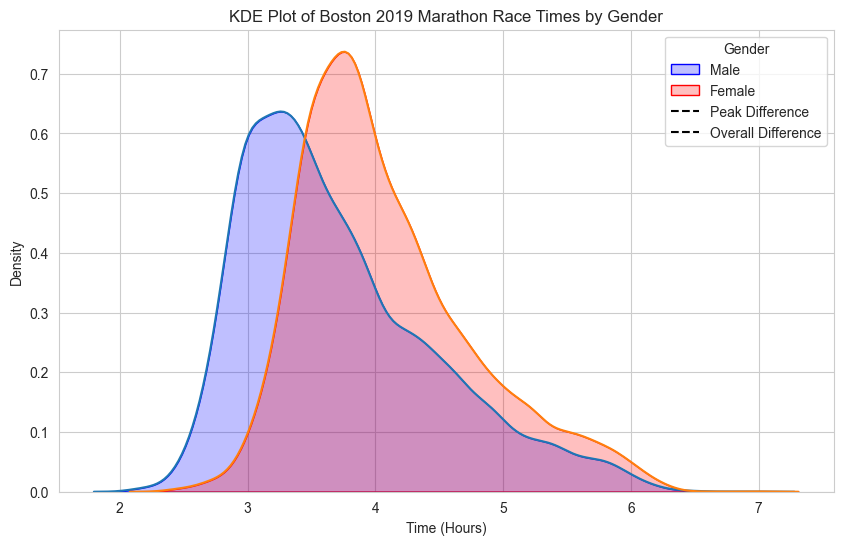

In [34]:
# Convert 'Result_hr' to timedelta
df['Result_hr'] = pd.to_timedelta(df['Result_hr'])

# Calculate race times in hours
df['Result_hr_numeric'] = df['Result_hr'].dt.total_seconds() / 3600

# Set up the Seaborn style
sns.set_style("whitegrid")

# Plot the KDE distribution of race times by gender
plt.figure(figsize=(10, 6))

# Calculate and plot KDE 
sns.kdeplot(data=df[df['Gender'] == 'M'], x='Result_hr_numeric', label='Male', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=df[df['Gender'] == 'F'], x='Result_hr_numeric', label='Female', fill=True, common_norm=False, color='red')

# Calculate KDE lines only (fill=False) so we can get the line x and y
male_kde = sns.kdeplot(data=df[df['Gender'] == 'M'], x='Result_hr_numeric', fill=False)
female_kde = sns.kdeplot(data=df[df['Gender'] == 'F'], x='Result_hr_numeric', fill=False)

# Get the x y data of the kde distributions
x_male = male_kde.lines[0].get_xdata() 
x_female = female_kde.lines[0].get_xdata() 
y_male = male_kde.lines[0].get_ydata() 
y_female = female_kde.lines[0].get_ydata() 

# Find IDs of maximum y values of KDE curves
max_male = np.argmax(y_male)
max_female = np.argmax(y_female)

# Get x-values of the maximum points
x_max_male = x_male[max_male]
x_max_female = x_female[max_female]
print(x_max_male, x_max_female) #the calculated peaks have the identical value for M and F. There seems to be a mistake but I cannot find it

# Get x-axis limits
xlim = plt.xlim()

# Draw horizontal lines
plt.axhline(0.7, color='black', linestyle='--', label='Peak Difference', xmin=(x_max_male - xlim[0]) / (xlim[1] - xlim[0]), xmax=(x_max_female - xlim[0]) / (xlim[1] - xlim[0]))

# Calculate overall range
min_x = df['Result_hr_numeric'].min()
max_x = df['Result_hr_numeric'].max()

# Draw second horizontal line
#plt.axhline(0.65, color='black', linestyle='--', label='Overall Difference', xmin=(min_x - xlim[0]) / (xlim[1] - xlim[0]), xmax=(max_x - xlim[0]) / (xlim[1] - xlim[0]))
plt.axhline(0.65, color='black', linestyle='--', label='Overall Difference', xmin=min_x, xmax=max_x)

plt.xlabel('Time (Hours)')
plt.ylabel('Density')
plt.title('KDE Plot of Boston 2019 Marathon Race Times by Gender')

plt.legend(title='Gender')
plt.show()